Remapping C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\GOES-16 Samples\\OR_ABI-L2-CMIPF-M3C09_G16_s20183532130334_e20183532141106_c20183532141183.nc
- finished! Time: 1.0417566299438477 seconds


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000026AC39EDB10> >

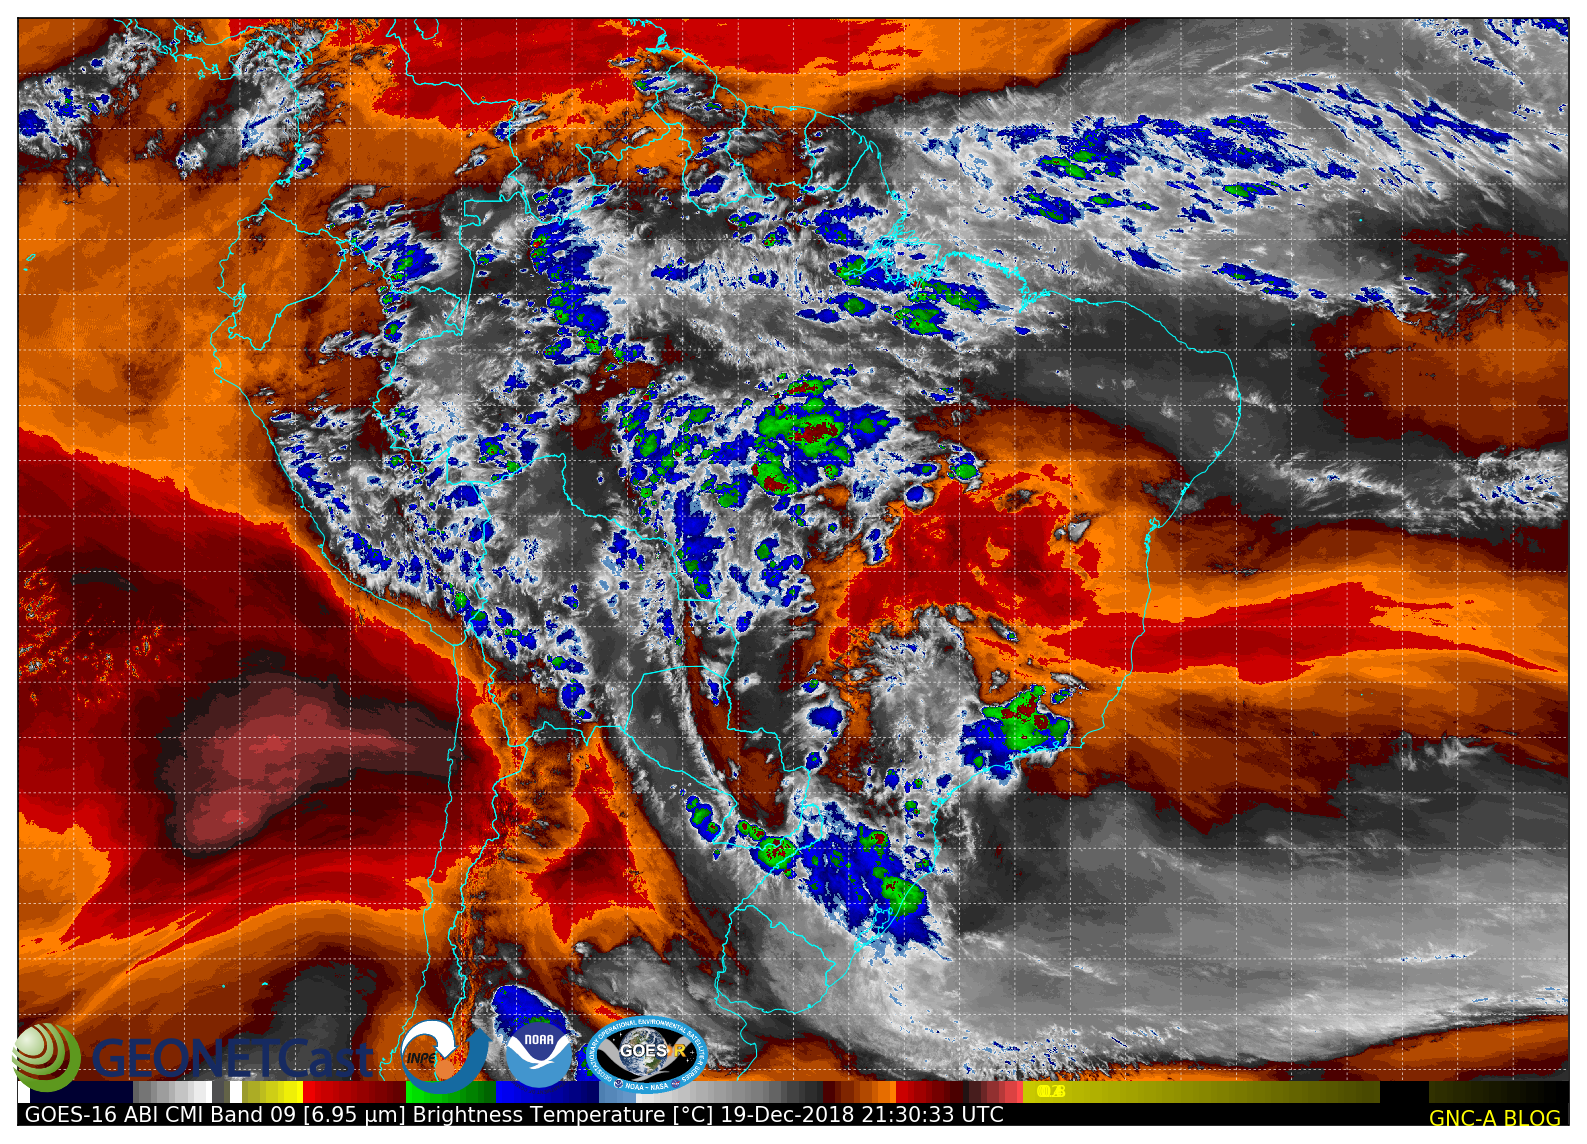

In [2]:
#======================================================================================================
# GNC-A Blog Python Tutorial: Part VII
#======================================================================================================# Required libraries ==================================================================================
import matplotlib.pyplot as plt # Import the Matplotlib package
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit&amp;amp;amp;amp;lt;/pre&amp;amp;amp;amp;gt;
import numpy as np # Import the Numpy package
 
from remap import remap # Import the Remap function
 
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
 
import datetime # Library to convert julian day to dd-mm-yyyy
 
from matplotlib.patches import Rectangle # Library to draw rectangles on the plot
from osgeo import gdal # Add the GDAL library
#======================================================================================================
 
# Load the Data =======================================================================================
# Path to the GOES-16 image file
path = r'C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\GOES-16 Samples\\OR_ABI-L2-CMIPF-M3C09_G16_s20183532130334_e20183532141106_c20183532141183.nc'

# Choose the visualization extent (min lon, min lat, max lon, max lat)
#extent = [-85.0, -5.0, -60.0, 12.0]
extent = [-90.0, -40.0, -20, 10.0]
 
# Choose the image resolution (the higher the number the faster the processing is)
resolution = 2.0
 
# Call the reprojection funcion
grid = remap(path, extent, resolution, 'HDF5')
 
# Read the data returned by the function and convert it to Celsius
data = grid.ReadAsArray() - 273.15
#======================================================================================================
 
# Define the size of the saved picture=================================================================
DPI = 150
ax = plt.figure(figsize=(2000/float(DPI), 2000/float(DPI)), frameon=True, dpi=DPI)
#======================================================================================================
 
# Plot the Data =======================================================================================
# Create the basemap reference for the Rectangular Projection
bmap = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], epsg=4326)
 
# Draw the countries and Brazilian states shapefiles
# bmap.readshapefile(r'C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Shapefiles\\BRA_adm1','BRA_adm1',linewidth=0.50,color='cyan')
bmap.readshapefile(r'C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Countries_Shape\\ne_10m_admin_0_countries','ne_10m_admin_0_countries',linewidth=0.50,color='cyan')
 
# Draw parallels and meridians
bmap.drawparallels(np.arange(-90.0, 90.0, 2.5), linewidth=0.3, dashes=[4, 4], color='white', labels=[False,False,False,False], fmt='%g', labelstyle="+/-", xoffset=-0.80, yoffset=-1.00, size=7)
bmap.drawmeridians(np.arange(0.0, 360.0, 2.5), linewidth=0.3, dashes=[4, 4], color='white', labels=[False,False,False,False], fmt='%g', labelstyle="+/-", xoffset=-0.80, yoffset=-1.00, size=7)
 
# Converts a CPT file to be used in Python
cpt = loadCPT('C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Colortables\\SVGAWVX_TEMP.cpt')

# Makes a linear interpolation
cpt_convert = LinearSegmentedColormap('cpt', cpt)
 
# Plot the GOES-16 channel with the converted CPT colors (you may alter the min and max to match your preference)
bmap.imshow(data, origin='upper', cmap=cpt_convert, vmin=-112.15, vmax=56.85)
 
# Insert the colorbar at the bottom
cb = bmap.colorbar(location='bottom', size = '2%', pad = '-4%', ticks=[0.2, 0.4, 0.6, 0.8])
cb.outline.set_visible(False) # Remove the colorbar outline
cb.ax.tick_params(width = 0) # Remove the colorbar ticks
cb.ax.xaxis.set_tick_params(pad=-12.5) # Put the colobar labels inside the colorbar
cb.ax.tick_params(axis='x', colors='yellow', labelsize=8) # Change the color and size of the colorbar labels


# Search for the Scan start in the file name
Start = (path[path.find("_s")+2:path.find("_e")])
# Search for the GOES-16 channel in the file name
Band = (path[path.find("M3C")+3:path.find("_G16")])
# Create a GOES-16 Bands string array
Wavelenghts = ['[]','[0.47 μm]','[0.64 μm]','[0.865 μm]','[1.378 μm]','[1.61 μm]','[2.25 μm]','[3.90 μm]','[6.19 μm]','[6.95 μm]','[7.34 μm]','[8.50 μm]','[9.61 μm]','[10.35 μm]','[11.20 μm]','[12.30 μm]','[13.30 μm]']
 
# Converting from julian day to dd-mm-yyyy
year = int(Start[0:4])
dayjulian = int(Start[4:7]) - 1 # Subtract 1 because the year starts at "0"
dayconventional = datetime.datetime(year,1,1) + datetime.timedelta(dayjulian) # Convert from julian to conventional
date = dayconventional.strftime('%d-%b-%Y') # Format the date according to the strftime directives
 
time = Start [7:9] + ":" + Start [9:11] + ":" + Start [11:13] + " UTC" # Time of the Start of the Scan
 
Unit = "Brightness Temperature [°C]"
Title = " GOES-16 ABI CMI Band " + Band + " " + Wavelenghts[int(Band)] + " " + Unit + " " + date + " " + time
Institution = "GNC-A BLOG "
 
# Add a black rectangle in the bottom to insert the image description
lon_difference = (extent[2] - extent[0]) # Max Lon - Min Lon
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((extent[0], extent[1]), lon_difference, lon_difference * 0.015, alpha=1, zorder=3, facecolor='black'))
 
# Add the image description inside the black rectangle
lat_difference = (extent[3] - extent[1]) # Max lat - Min lat
plt.text(extent[0], extent[1] + lat_difference * 0.003,Title,horizontalalignment='left', color = 'white', size=10)
plt.text(extent[2], extent[1],Institution, horizontalalignment='right', color = 'yellow', size=10)
 
# Add logos / images to the plot
logo_GNC = plt.imread('C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Logos\\GNC Logo.png')
logo_INPE = plt.imread('C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Logos\\INPE Logo.png')
logo_NOAA = plt.imread('C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Logos\\NOAA Logo.png')
logo_GOES = plt.imread('C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Logos\\GOES Logo.png')
ax.figimage(logo_GNC, 10, 50, zorder=3, alpha = 1, origin = 'upper')
ax.figimage(logo_INPE, 400, 50, zorder=3, alpha = 1, origin = 'upper')
ax.figimage(logo_NOAA, 500, 50, zorder=3, alpha = 1, origin = 'upper')
ax.figimage(logo_GOES, 585, 50, zorder=3, alpha = 1, origin = 'upper')
 
# Save the result
plt.savefig('C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Output\\Tutorial7_2Channel_09.png', dpi=DPI, bbox_inches='tight', pad_inches=0)


# Export the result to GeoTIFF
driver = gdal.GetDriverByName('GTiff')
driver.CreateCopy('C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Output\\Tutorial7_2_Channel_09.tif', grid, 0)
#===============================================